In [17]:
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parámetros
# X : Conjunto de datos de entrada.
# k : Número de clusters que se desean obtener.
# n_clusters : Número de clusters que se crearán en cada iteración.
# max_iter : Número máximo de iteraciones que se ejecutarán.
# sample_size : Tamaño de la muestra aleatoria que se utilizará en cada iteración.

def clara(X, k, n_clusters, max_iter, sample_size):

    # Paso 1: Generar un conjunto de muestras aleatorias
    samples = []
    for i in range(max_iter):
        sample = X[np.random.choice(X.shape[0], size=sample_size, replace=False)]
        samples.append(sample)

    # Paso 2: Ejecutar el algoritmo de clustering en cada muestra
    clusterings = []
    for i in range(max_iter):
        km = KMeans(n_clusters=n_clusters, n_init=1).fit(samples[i])
        clusterings.append(km)

    # Paso 3: Seleccionar el mejor conjunto de clusters
    best_labels = None
    best_inertia = np.inf
    for i in range(max_iter):
        labels = clusterings[i].predict(X)
        inertia = clusterings[i].inertia_

        if inertia < best_inertia:
            best_labels = labels
            best_inertia = inertia

    return best_labels

In [3]:
# Dataset iris
iris =  datasets.load_iris()
data = iris.data

In [4]:
# Parámetros para CLARA
k = 3
n_clusters = 3
max_iter = 100
sample_size = 100

In [5]:
# Ejecutar CLARA
labels = clara(data, k, n_clusters, max_iter, sample_size)

In [6]:
print("Clase reales de cada punto de datos: \n",iris.target)

Clase reales de cada punto de datos: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


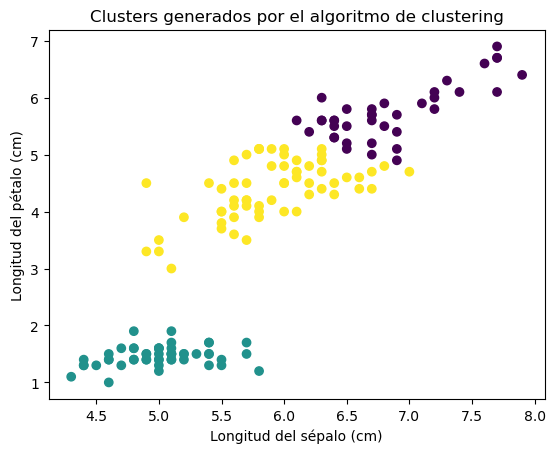

In [19]:
plt.scatter(data[:, 0], data[:, 2], c=labels)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Clusters generados por el algoritmo de clustering')
plt.show()